# Importing and Cleaning the Data

In [ ]:
from pandas.plotting import scatter_matrix # optional
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.compose import ColumnTransformer
import random

# Your code goes here for this section.
crashes = pd.read_csv("Virginia_Crashes.csv")
crashes.head()

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (45) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,X,Y,OBJECTID,Document_Nbr,Crash_Year,Route_Or_Street_Nm,Local_Case_Cd,Collision_Type,Roadway_Surface_Cond,First_Harmful_Event_of_Entire,...,Distracted_Notdistracted,LATITUDE,LONGITUDE,Physical_Juris,VDOT_District,DIAGRAM,VSP,MPO_NAME,PLAN_DISTRICT,Crash_Dt
0,-77.309935,37.543922,1001,130085090,2013,N AIRPORT DR.,130107163,2. Angle,1. Dry,1. On Roadway,...,DISTRACTED,37.543915,-77.309933,43.Henrico,4.Richmond District,http://rns/APP/Images/CrashDiagramProxy.aspx?d...,1,Richmond Transportation Planning Organization,15.Richmond Regional,2013-01-08T00:00:00.000Z
1,-77.625728,37.405874,1002,130085092,2013,12601 BAILEY BRIDGE ROAD,20130107039,1. Rear End,1. Dry,1. On Roadway,...,NaN,37.405867,-77.625726,20.Chesterfield,4.Richmond District,http://rns/APP/Images/CrashDiagramProxy.aspx?d...,1,Richmond Transportation Planning Organization,"15,19.Crater, Richmond",2013-01-08T00:00:00.000Z
2,-77.397551,37.548275,1003,130085093,2013,INTERSTATE 64,DIV113002325,3. Head On,1. Dry,1. On Roadway,...,NaN,37.548268,-77.397549,43.Henrico,4.Richmond District,http://rns/APP/Images/CrashDiagramProxy.aspx?d...,1,Richmond Transportation Planning Organization,15.Richmond Regional,2013-01-08T00:00:00.000Z
3,-77.447454,38.297423,1004,130085094,2013,RT 3,2013-79,1. Rear End,1. Dry,1. On Roadway,...,NaN,38.297415,-77.447451,89.Stafford,6.Fredericksburg District,http://rns/APP/Images/CrashDiagramProxy.aspx?d...,2,Fredericksburg Area Metropolitan Planning Orga...,16.George Washington Regional,2013-01-04T00:00:00.000Z
4,-77.484682,38.767450,1005,130085098,2013,SUDLEY RD,13000123,1. Rear End,1. Dry,1. On Roadway,...,DISTRACTED,38.767442,-77.484679,155.Manassas,9.Northern Virginia District,http://rns/APP/Images/CrashDiagramProxy.aspx?d...,7,Northern Virginia Portion of The Metropolitan ...,8.Northern Virginia,2013-01-08T00:00:00.000Z


In [ ]:
crashes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893663 entries, 0 to 893662
Data columns (total 68 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   X                              893663 non-null  float64
 1   Y                              893663 non-null  float64
 2   OBJECTID                       893663 non-null  int64  
 3   Document_Nbr                   893663 non-null  int64  
 4   Crash_Year                     893663 non-null  int64  
 5   Route_Or_Street_Nm             893663 non-null  object 
 6   Local_Case_Cd                  891493 non-null  object 
 7   Collision_Type                 893663 non-null  object 
 8   Roadway_Surface_Cond           893663 non-null  object 
 9   First_Harmful_Event_of_Entire  893663 non-null  object 
 10  Weather_Condition              893663 non-null  object 
 11  Light_Condition                893663 non-null  object 
 12  School_Zone                   

In [ ]:
#Cleaning the data, dropping non-useful categories
crashes_cleaned = crashes.drop(['X', 'Y', 'OBJECTID', 'Document_Nbr', 'Local_Case_Cd',
                                'Passinjurytype', 'Passage', 'Route_Or_Street_Nm',
                                'Passgen', 'Pedinjurytype', 'Pedage', 'Pedgen', 'Node_Info',
                                'DIAGRAM', 'MPO_NAME', 'Crash_Dt', 'Vehicle_Body_Type_Cd',
                                'Driverinjurytype', 'Driverage', 'Drivergen', 'Rte_Nm', 'Physical_Juris',
                                'Fatal_Crashes', 'Pedestrians_Killed', 'Pedestrians_Injured',
                                'K_People', 'A_People', 'B_People', 'C_People', 'A_Crash',
                                'B_Crash', 'C_Crash', 'Pdo_Crash'], axis=1)
crashes_cleaned["Bike_Nonbike"].fillna("No Bike", inplace = True)
crashes_cleaned["Motor_Nonmotor"].fillna("No Moter", inplace = True)
crashes_cleaned["Speed_Notspeed"].fillna("Not Speeding", inplace = True)
crashes_cleaned["Belted_Unbelted"].fillna("Belted", inplace = True)
crashes_cleaned["Alcohol_Notalcohol"].fillna("No Alcohol", inplace = True)
crashes_cleaned["Young_Notyoung"].fillna("Not Young", inplace = True)
crashes_cleaned["Senior_Notsenior"].fillna("Not Senior", inplace = True)
crashes_cleaned["Deer_Nodeer"].fillna("No Deer", inplace = True)
crashes_cleaned["Distracted_Notdistracted"].fillna("Not Distracted", inplace = True)
crashes_cleaned = crashes_cleaned[crashes_cleaned.LATITUDE != 0]
crashes_cleaned['Driver_Action_Type_Cd'] = crashes_cleaned['Driver_Action_Type_Cd'].str.split().str[0].str.strip()
crashes_cleaned.head()

,Crash_Year,Collision_Type,Roadway_Surface_Cond,First_Harmful_Event_of_Entire,Weather_Condition,Light_Condition,School_Zone,Crash_Severity,Ped_Nonped,Bike_Nonbike,...,FUN,FAC,Carspeedlimit,Deer_Nodeer,Distracted_Notdistracted,LATITUDE,LONGITUDE,VDOT_District,VSP,PLAN_DISTRICT
0,2013,2. Angle,1. Dry,1. On Roadway,1. No Adverse Condition (Clear/Cloudy),2. Daylight,3. No,A.Severe Injury,NOTPED,No Bike,...,H.Urban Minor Arterial,"2.Divided, partial control of access",55,No Deer,DISTRACTED,37.543915,-77.309933,4.Richmond District,1,15.Richmond Regional
1,2013,1. Rear End,1. Dry,1. On Roadway,1. No Adverse Condition (Clear/Cloudy),2. Daylight,2. Yes - With School Activity,PDO.Property Damage Only,NOTPED,No Bike,...,I.Urban Collector,"0.Two-way, non-divided",35,No Deer,Not Distracted,37.405867,-77.625726,4.Richmond District,1,"15,19.Crater, Richmond"
2,2013,3. Head On,1. Dry,1. On Roadway,1. No Adverse Condition (Clear/Cloudy),2. Daylight,3. No,PDO.Property Damage Only,NOTPED,No Bike,...,A.Urban Interstate,"3.Divided, full control of access",55,No Deer,Not Distracted,37.548268,-77.397549,4.Richmond District,1,15.Richmond Regional
3,2013,1. Rear End,1. Dry,1. On Roadway,1. No Adverse Condition (Clear/Cloudy),2. Daylight,3. No,PDO.Property Damage Only,NOTPED,No Bike,...,H.Urban Minor Arterial,"1.Divided, no control of access",45,No Deer,Not Distracted,38.297415,-77.447451,6.Fredericksburg District,2,16.George Washington Regional
4,2013,1. Rear End,1. Dry,1. On Roadway,1. No Adverse Condition (Clear/Cloudy),1. Dawn,3. No,PDO.Property Damage Only,NOTPED,No Bike,...,H.Urban Minor Arterial,"1.Divided, no control of access",0,No Deer,DISTRACTED,38.767442,-77.484679,9.Northern Virginia District,7,8.Northern Virginia


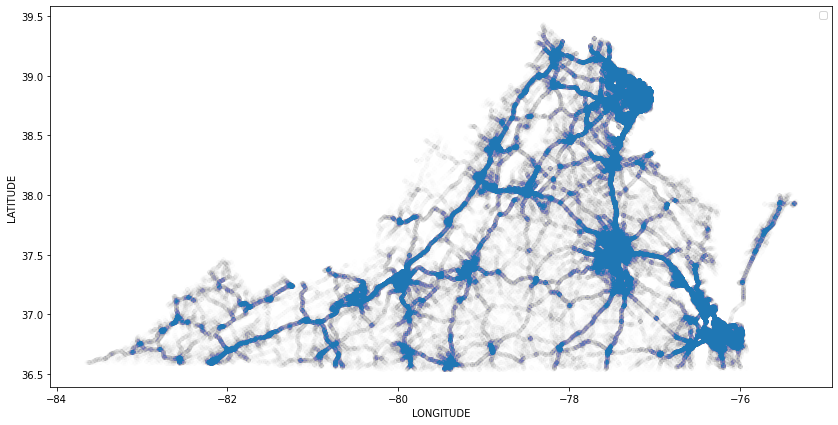

In [ ]:
crashes_cleaned.plot(kind="scatter", x="LONGITUDE", y="LATITUDE", alpha=0.005, figsize=(14,7), sharex=False, )
plt.legend()

In [ ]:
crashes_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 893658 entries, 0 to 893662
Data columns (total 35 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Crash_Year                     893658 non-null  int64  
 1   Collision_Type                 893658 non-null  object 
 2   Roadway_Surface_Cond           893658 non-null  object 
 3   First_Harmful_Event_of_Entire  893658 non-null  object 
 4   Weather_Condition              893658 non-null  object 
 5   Light_Condition                893658 non-null  object 
 6   School_Zone                    893658 non-null  object 
 7   Crash_Severity                 893658 non-null  object 
 8   Ped_Nonped                     893658 non-null  object 
 9   Bike_Nonbike                   893658 non-null  object 
 10  Motor_Nonmotor                 893658 non-null  object 
 11  Speed_Notspeed                 893658 non-null  object 
 12  Belted_Unbelted               

In [ ]:
crashes_cleaned = crashes_cleaned.dropna()
sample_incomplete_rows = crashes_cleaned[crashes_cleaned.isnull().any(axis=1)]
sample_incomplete_rows

,Crash_Year,Collision_Type,Roadway_Surface_Cond,First_Harmful_Event_of_Entire,Weather_Condition,Light_Condition,School_Zone,Crash_Severity,Ped_Nonped,Bike_Nonbike,...,FUN,FAC,Carspeedlimit,Deer_Nodeer,Distracted_Notdistracted,LATITUDE,LONGITUDE,VDOT_District,VSP,PLAN_DISTRICT


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler

num_attribs = num_attribs = ["Crash_Year", 
                             "Crash_Military_Tm", "Rns_Mp", 
                             "Carspeedlimit", "LATITUDE", "LONGITUDE", "VSP"]

cat_attribs = ["Collision_Type", "Roadway_Surface_Cond", "First_Harmful_Event_of_Entire", "Weather_Condition", "Light_Condition", 
               "School_Zone", "Crash_Severity", "Ped_Nonped", "Bike_Nonbike", "Motor_Nonmotor", "Speed_Notspeed", "Belted_Unbelted", 
               "Alcohol_Notalcohol", "Rd_Type", "Crash_Event_Type_Dsc", "Time_Slicing", "Vehiclenumber", "Driver_Action_Type_Cd",
               "Young_Notyoung", "Senior_Notsenior", "Ownership", "SYSTEM", "FUN", "FAC", "Deer_Nodeer", "Distracted_Notdistracted",
               "VDOT_District", "PLAN_DISTRICT"]

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler())
    ])

cat_pipeline = Pipeline([
        ('ord_encoder', OrdinalEncoder()),
        #('std_scaler', MinMaxScaler(feature_range=(0,9)))             
    ])

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs)
    ])

In [ ]:
crashes_prepared = full_pipeline.fit_transform(crashes_cleaned)
crashes_prepared.shape

(792861, 35)

In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(crashes_prepared, test_size=0.2, random_state=42)

In [ ]:
y_train = train_set[:,13]
x_train = np.delete(train_set, 13, axis=1)
y_test = test_set[:, 13]
x_test = np.delete(test_set, 13, axis=1)
np.unique(y_train)

array([0., 1., 2., 3., 4.])

# Clustering

In [ ]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(n_clusters=2)
kmeans.fit(crashes_prepared)
y_kmeans = kmeans.predict(crashes_prepared)

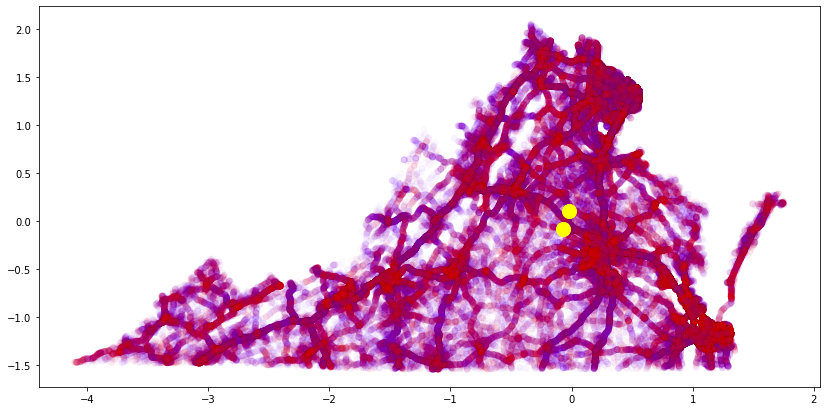

In [ ]:
plt.figure(figsize=(14, 7))
plt.scatter(crashes_prepared[:, 5], crashes_prepared[:, 4], c=y_kmeans, cmap='rainbow', alpha=0.02)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=200, alpha=1.0);
#2 colors: red, purple

In [ ]:
kmeans = MiniBatchKMeans(n_clusters=3)
kmeans.fit(crashes_prepared)
y_kmeans = kmeans.predict(crashes_prepared)

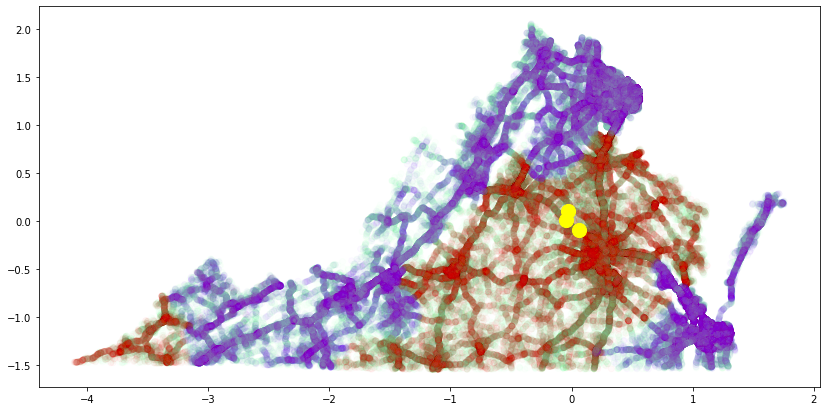

In [ ]:
plt.figure(figsize=(14, 7))
plt.scatter(crashes_prepared[:, 5], crashes_prepared[:, 4], c=y_kmeans, cmap='rainbow', alpha=0.02)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=200, alpha=1.0);
#3 colors: green, purple, red

In [ ]:
kmeans = MiniBatchKMeans(n_clusters=4)
kmeans.fit(crashes_prepared)
y_kmeans = kmeans.predict(crashes_prepared)

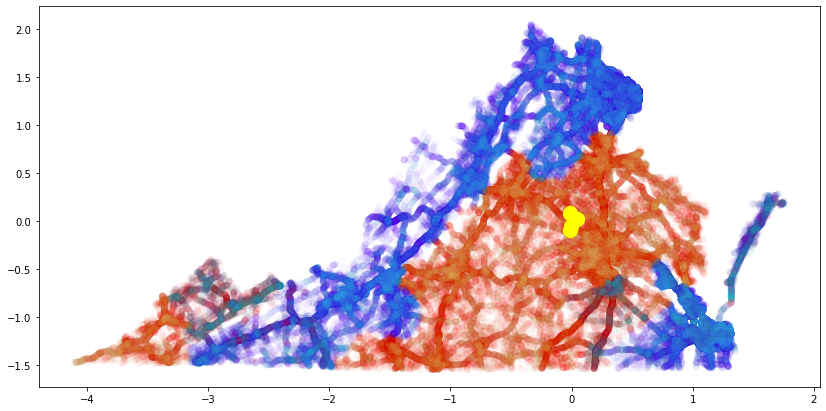

In [ ]:
plt.figure(figsize=(14, 7))
plt.scatter(crashes_prepared[:, 5], crashes_prepared[:, 4], c=y_kmeans, cmap='rainbow', alpha=0.02)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=200, alpha=1.0);
#4 colors: blue, purple, yellow, orange

In [ ]:
kmeans = MiniBatchKMeans(n_clusters=5, n_init=100)
kmeans.fit(crashes_prepared)
y_kmeans = kmeans.predict(crashes_prepared)

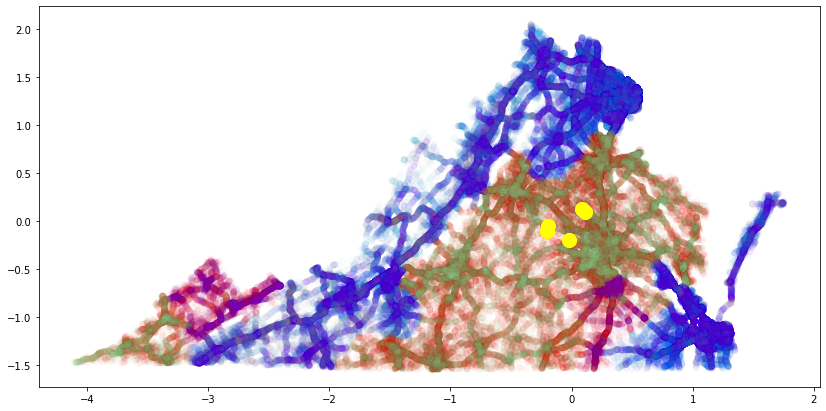

In [ ]:
plt.figure(figsize=(14, 7))
plt.scatter(crashes_prepared[:, 5], crashes_prepared[:, 4], c=y_kmeans, cmap='rainbow', alpha=0.02)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=200, alpha=1.0);
#5 colors: purple, blue, orange, yellow, pink

In [ ]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = MiniBatchKMeans(n_clusters=k, n_init=100)
    km = km.fit(crashes_prepared)
    Sum_of_squared_distances.append(km.inertia_)

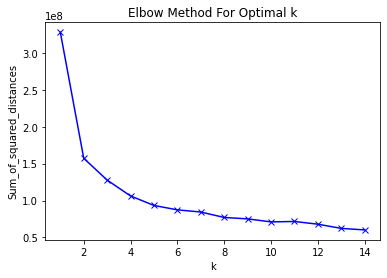

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()
plt.savefig('plot.png')

# ANN

In [ ]:
x_train_ann, x_val_ann, y_train_ann, y_val_ann = train_test_split(x_train, y_train, test_size= 0.1, random_state=49)

In [ ]:
from tensorflow import keras
from keras.layers import Activation, Dense

my_model = keras.models.Sequential([
    keras.layers.Flatten(),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.Activation("relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(5, activation="softmax")
])

my_model.compile(optimizer=keras.optimizers.SGD(lr=1e-3),
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

my_model.fit(x_train_ann, y_train_ann, validation_data = (x_val_ann, y_val_ann), epochs = 10)

my_model.evaluate(x = x_test, y = y_test)

Train on 570859 samples, validate on 63429 samples
Epoch 1/10
570859/570859 [==============================] - 26s 46us/sample - loss: 0.9929 - accuracy: 0.6449 - val_loss: 0.9169 - val_accuracy: 0.6700
Epoch 2/10
570859/570859 [==============================] - 26s 45us/sample - loss: 0.9098 - accuracy: 0.6675 - val_loss: 0.8999 - val_accuracy: 0.6722
Epoch 3/10
570859/570859 [==============================] - 26s 45us/sample - loss: 0.9002 - accuracy: 0.6686 - val_loss: 0.8947 - val_accuracy: 0.6727
Epoch 4/10
570859/570859 [==============================] - 26s 46us/sample - loss: 0.8958 - accuracy: 0.6689 - val_loss: 0.8912 - val_accuracy: 0.6737
Epoch 5/10
570859/570859 [==============================] - 26s 45us/sample - loss: 0.8925 - accuracy: 0.6692 - val_loss: 0.8897 - val_accuracy: 0.6730
Epoch 6/10
570859/570859 [==============================] - 25s 44us/sample - loss: 0.8906 - accuracy: 0.6698 - val_loss: 0.8876 - val_accuracy: 0.6728
Epoch 7/10
570859/570859 [===========

[0.8862816247095503, 0.67012036]

# SVM Model

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.multiclass import OneVsRestClassifier

n_estimators = 34
clf = OneVsRestClassifier(BaggingClassifier(SVC(kernel='linear', probability=True, 
                                                class_weight='balanced'), max_samples=1.0 / n_estimators, n_estimators=n_estimators))

In [ ]:
clf.fit(x_val_ann, y_val_ann)

OneVsRestClassifier(estimator=BaggingClassifier(base_estimator=SVC(C=1.0,
                                                                   break_ties=False,
                                                                   cache_size=200,
                                                                   class_weight='balanced',
                                                                   coef0=0.0,
                                                                   decision_function_shape='ovr',
                                                                   degree=3,
                                                                   gamma='scale',
                                                                   kernel='linear',
                                                                   max_iter=-1,
                                                                   probability=True,
                                                                   random_state=No

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.4731953106771014


# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
from sklearn.metrics import mean_squared_error
y_predict = lin_reg.predict(x_test)
mse = mean_squared_error(y_test, y_predict)
lin_reg_rmse = np.sqrt(mse)
print("SKlearn Model RMSE: " + str(lin_reg_rmse))

SKlearn Model RMSE: 1.3291925919078378


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_pred = forest_reg.predict(x_test)
forest_mse = mean_squared_error(y_pred, y_test)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

1.325981607022761

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42, min_samples_leaf=20)
tree_reg.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=20, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [ ]:
y_pred = tree_reg.predict(x_test)
tree_mse = mean_squared_error(y_pred, y_test)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

1.3981916096906937